In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import lmfit

In [ ]:
ROOT_PATH = Path().resolve()
CSV_PATH = ROOT_PATH / "3_2.csv"

In [3]:
df = pd.read_csv(CSV_PATH, sep="\t")
df.head(3)

,n_proc,time
0,1,8.252
1,2,4.136
2,3,2.767


In [4]:
df["speedup"] = df["time"].iloc[0] / df["time"]

In [10]:
def T_p(p, T_1, F):
    return (1-F) * T_1 + F * T_1 / p

model = lmfit.Model(T_p)
params = model.make_params()
params["T_1"].set(value=df["time"].iloc[0], vary=False)
params["F"].set(value=1.0, min=0.0, max=1.0)
fit = model.fit(df["time"], params, p=df["n_proc"])
fit

In [14]:
F = fit.params["F"].value
max_speedup = 1 / (1-F)
max_speedup

np.float64(227.5372821244067)

In [ ]:
dfm = pd.melt(df, id_vars=["n_proc"], value_vars=["time", "speedup"])

<Axes: xlabel='n_proc', ylabel='value'>

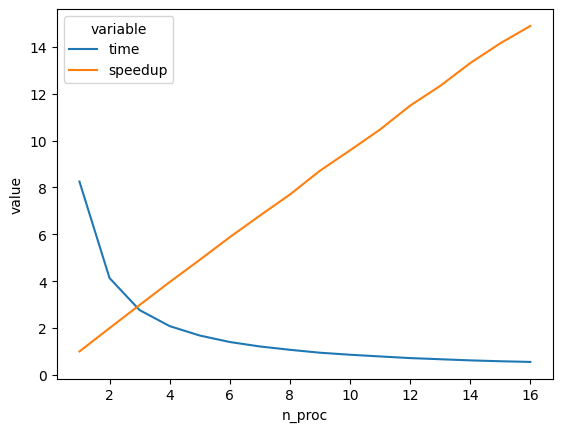

In [ ]:
sns.lineplot(dfm, x="n_proc", y="value", hue="variable")

In [ ]:
sns.lineplot(df, x="n_proc", y="time")